In [1]:
from pathlib import Path

from rljax.algorithm import DQN
from rljax.trainer import Trainer
import numpy as np
import pandas as pd

from classes import Env, Preprocess

PATH = Path().cwd()

In [2]:
raw = Preprocess(PATH.joinpath('asset_data', 'TBT_UBT_data.csv'))
data = raw.process()

In [3]:
def return_rewards(current, last, action, p, c):
    return sum(current) - sum(last)

In [4]:
# 23,400 seconds between 9:30am and 4pm broken in 10 second increments

NUM_AGENT_STEPS = 10000
SEED = 0
DAYS = 1
DAY = 2340

env = Env(data, no_trade_period=5, steps=DAY*DAYS, reward_func=return_rewards)
env_test = env.copy_env()

algo = DQN(
    num_agent_steps=NUM_AGENT_STEPS,
    state_space=env.observation_space,
    action_space=env.action_space,
    seed=SEED,
    batch_size=256,
    start_steps=1000,
    update_interval=1,
    update_interval_target=400,
    eps_decay_steps=0,
    loss_type="l2",
    lr=1e-3,
)

trainer = Trainer(
    env=env,
    env_test=env_test,
    algo=algo,
    log_dir="",
    num_agent_steps=NUM_AGENT_STEPS,
    eval_interval=1000,
    seed=SEED,
)
trainer.train()

Num steps: 1000     Return: 0.2     Time: 0:00:28
Num steps: 2000     Return: -0.0    Time: 0:01:01
Num steps: 3000     Return: -0.0    Time: 0:01:33
Num steps: 4000     Return: -1.3    Time: 0:02:27
Num steps: 5000     Return: -1.6    Time: 0:03:02
Num steps: 6000     Return: 1.8     Time: 0:03:38
Num steps: 7000     Return: -3.3    Time: 0:04:34
Num steps: 8000     Return: -3.1    Time: 0:05:16
Num steps: 9000     Return: -0.1    Time: 0:05:46
Num steps: 10000    Return: -0.0    Time: 0:06:19


In [14]:
env_test.trade_indices_history[2]

[0,
 6,
 12,
 18,
 24,
 30,
 36,
 42,
 48,
 54,
 60,
 66,
 72,
 78,
 84,
 90,
 96,
 102,
 108,
 114,
 120,
 126,
 132,
 138,
 144,
 150,
 156,
 162,
 168,
 174,
 180,
 186,
 192,
 198,
 204,
 210,
 216,
 222,
 228,
 234,
 240,
 246,
 252,
 258,
 264,
 270,
 276,
 282,
 288,
 294,
 300,
 306,
 312,
 318,
 324,
 330,
 336,
 342,
 348,
 354,
 360,
 366,
 372,
 378,
 384,
 390,
 396,
 402,
 408,
 414,
 420,
 426,
 432,
 438,
 444,
 450,
 456,
 462,
 468,
 474,
 480,
 486,
 492,
 498,
 504,
 510,
 516,
 522,
 528,
 534,
 540,
 546,
 552,
 558,
 564,
 570,
 576,
 582,
 588,
 594,
 600,
 606,
 612,
 618,
 624,
 630,
 636,
 642,
 648,
 654,
 660,
 666,
 672,
 678,
 684,
 690,
 696,
 702,
 708,
 714,
 720,
 726,
 732,
 738,
 744,
 750,
 756,
 762,
 768,
 774,
 780,
 786,
 792,
 798,
 804,
 810,
 816,
 822,
 828,
 834,
 840,
 846,
 852,
 858,
 864,
 870,
 876,
 882,
 888,
 894,
 900,
 906,
 912,
 918,
 924,
 930,
 936,
 942,
 948,
 954,
 960,
 966,
 972,
 978,
 984,
 990,
 996,
 1002,
 1008,
 10

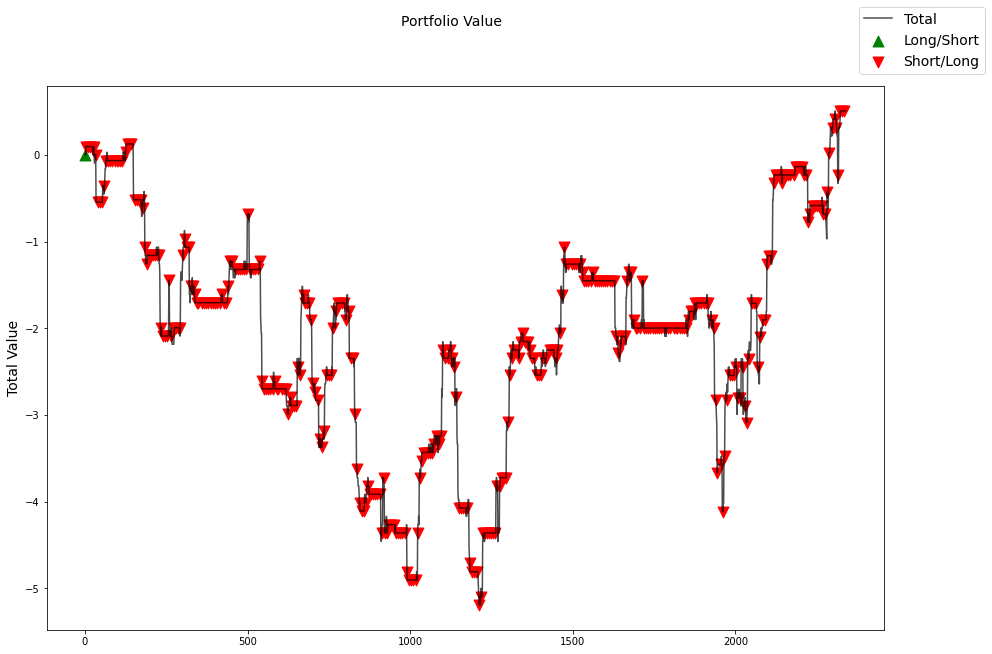

In [5]:
env.plot()

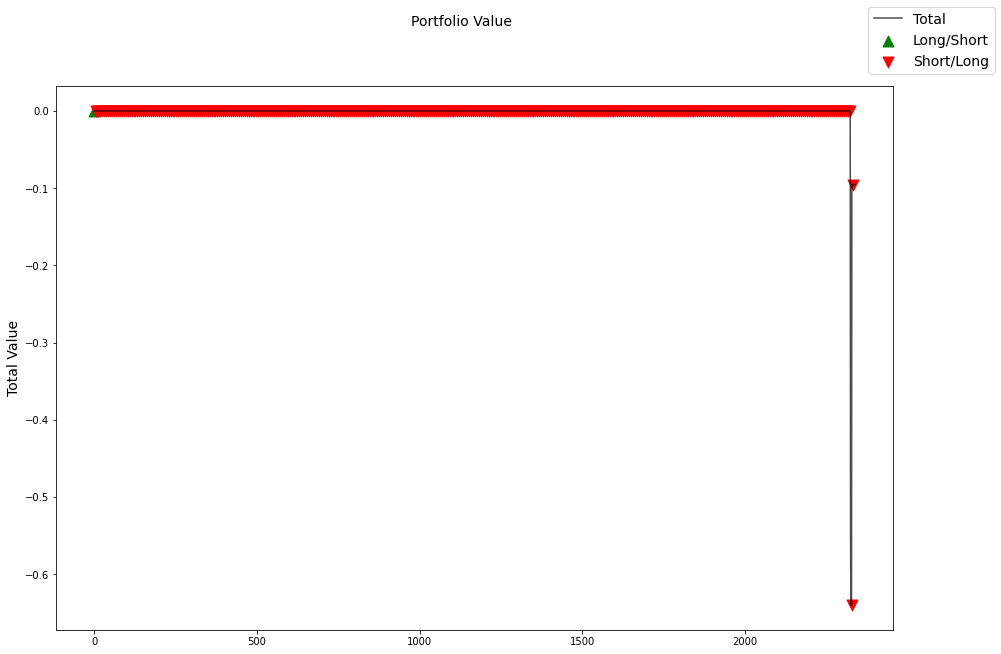

In [6]:
env_test.plot()

ValueError: x and y must have same first dimension, but have shapes (390,) and (2341,)

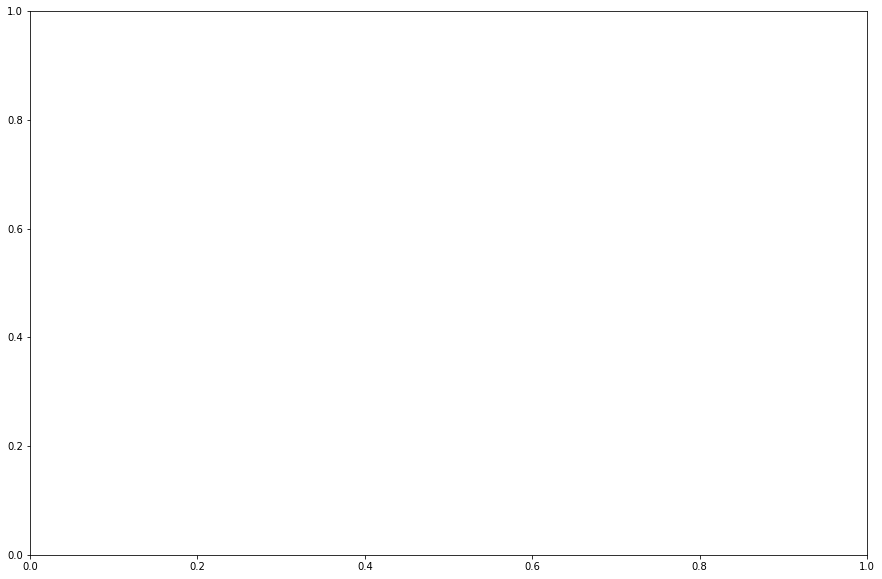

In [7]:
env_test.plot('position_history')

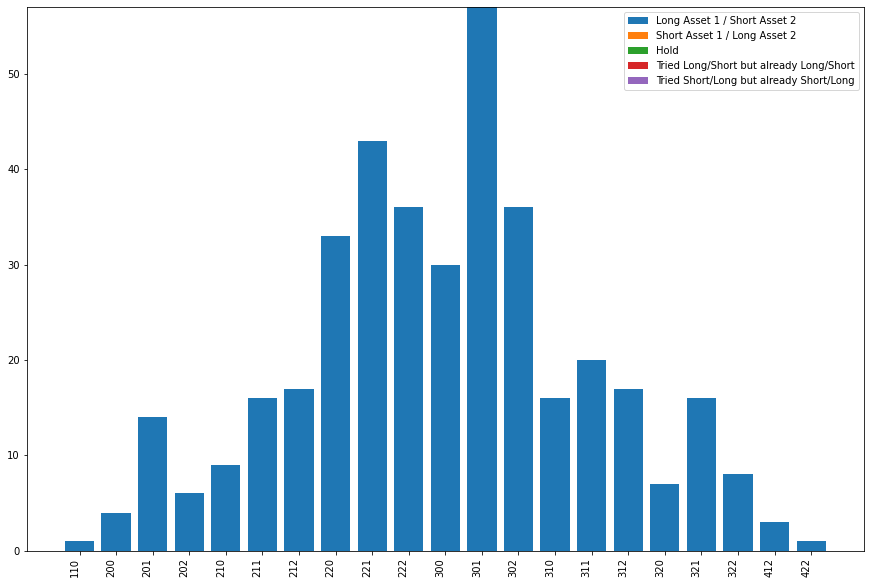

In [8]:
env_test.plot('summarize_decisions')

/mnt/c/Users/cspa3/Desktop/Projects/CitiProject/classes/env_history.py:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(self._portfolio_values_history)


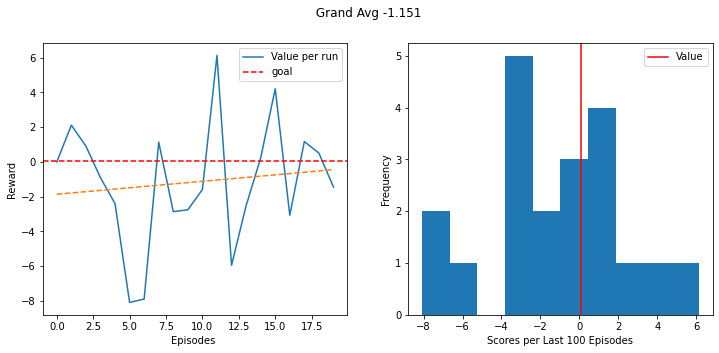

In [9]:
env.plot('learning_progress')